In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import seaborn as sns
%matplotlib inline

In [21]:
hotels = pd.read_csv(r"C:\Users\sahee\Downloads\CleanHotels.csv")

In [22]:
hotels.head()

,Name,City,Price,Rating,Stars,Reviews,Location,Cleanliness,staff,Comfort,Value for Money,Facilities,Wifi,Closest attraction dist,Closest transportation,Closest airport,payment methods,Number of languages,Allowing pets
0,Schulz Hotel Berlin Wall at the East Side Gal...,Budapest,191.0,8.7,3,18362,9.2,9.0,9.0,8.8,8.6,8.6,9.1,2.0,0.2,17.0,4.0,4,True
1,Novotel Suites Berlin City Potsdamer Platz,Budapest,259.0,8.2,3,4463,9.1,8.5,8.4,8.3,8.4,8.2,7.8,0.7,0.5,17.9,6.0,6,True
2,NH Collection Berlin Mitte Friedrichstrasse,Budapest,371.0,8.8,4,6220,9.6,9.0,9.0,9.0,8.5,8.8,8.8,0.9,0.1,19.3,6.0,4,True
3,Ibis budget Berlin Potsdamer Platz,Budapest,156.0,7.8,1,4716,9.0,8.6,8.3,8.1,7.6,7.4,8.4,0.8,0.4,17.9,4.0,5,True
4,Hollywood Media Hotel am Kurfürstendamm,Budapest,246.0,8.4,4,3505,9.4,8.8,8.6,8.6,8.4,8.4,8.6,3.4,0.4,20.0,7.0,2,True


In [23]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     5710 non-null   object 
 1   City                     5710 non-null   object 
 2   Price                    5710 non-null   float64
 3   Rating                   5710 non-null   float64
 4   Stars                    5710 non-null   int64  
 5   Reviews                  5710 non-null   int64  
 6   Location                 5710 non-null   float64
 7   Cleanliness              5710 non-null   float64
 8   staff                    5710 non-null   float64
 9   Comfort                  5710 non-null   float64
 10  Value for Money          5710 non-null   float64
 11  Facilities               5710 non-null   float64
 12  Wifi                     5710 non-null   float64
 13  Closest attraction dist  5710 non-null   float64
 14  Closest transportation  

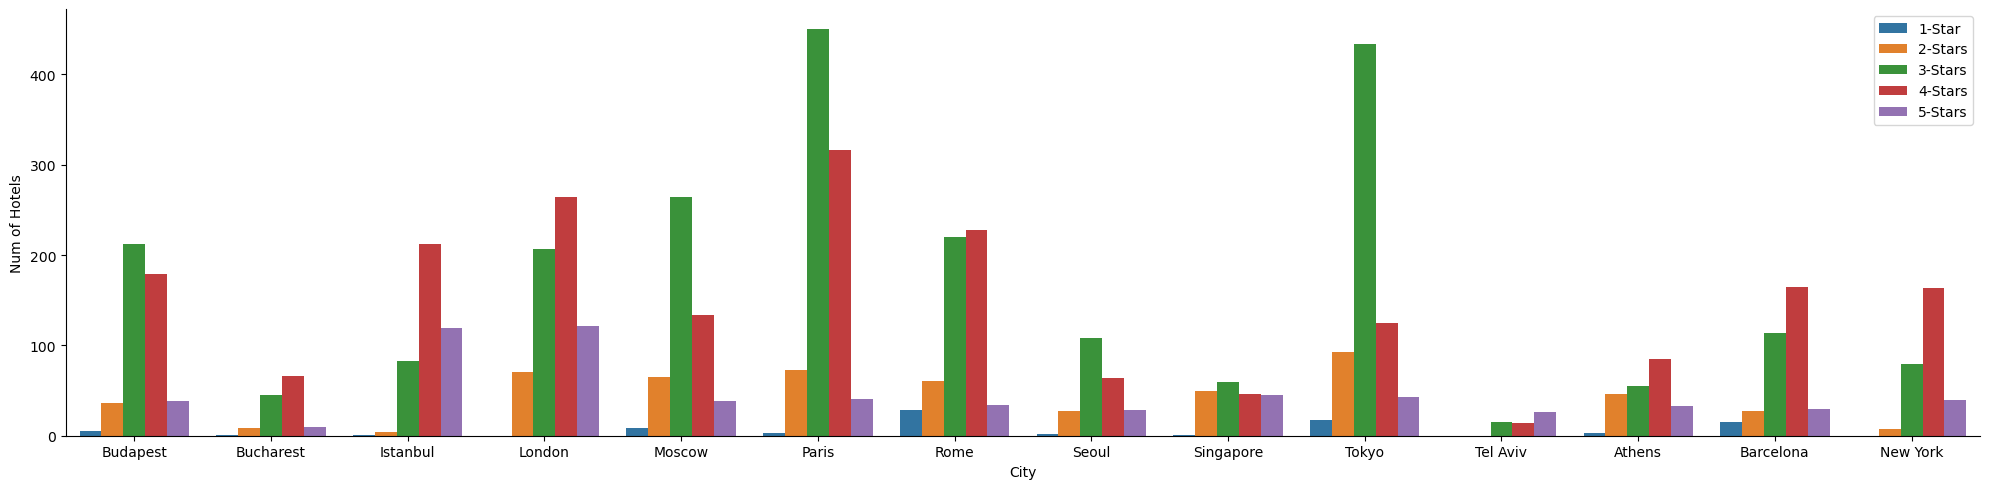

In [24]:
g = sns.catplot(
    x='City', 
    data = hotels,
    kind='count', 
    hue='Stars',
    height=5, 
    aspect=4,
    legend=False,
    ).set_axis_labels('City', 'Num of Hotels')
g.ax.legend(labels=['1-Star','2-Stars','3-Stars','4-Stars','5-Stars'])

<Axes: >

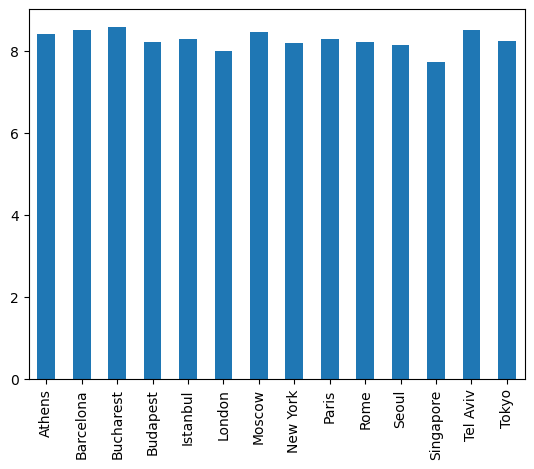

In [25]:
ratingmean = pd.Series(hotels.groupby('City').Rating.mean(), index=['Athens', 'Barcelona', 'Bucharest', 'Budapest','Istanbul','London','Moscow','New York', 'Paris','Rome','Seoul','Singapore','Tel Aviv', 'Tokyo'])
ratingmean.plot(kind='bar')

<Axes: >

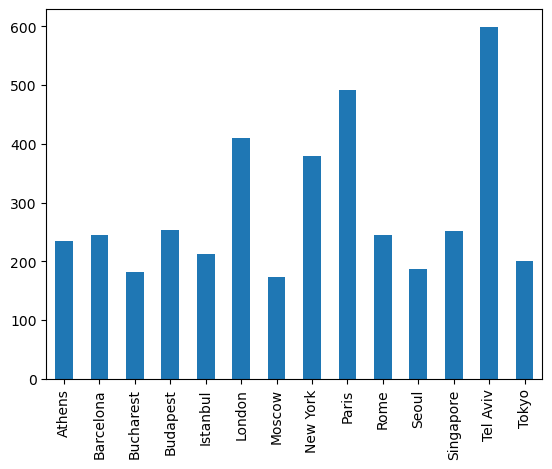

In [26]:
priceMean = pd.Series(hotels.groupby('City').Price.median(), index=['Athens', 'Barcelona', 'Bucharest', 'Budapest','Istanbul','London','Moscow','New York', 'Paris','Rome','Seoul','Singapore','Tel Aviv', 'Tokyo'])
priceMean.plot(kind='bar')

<Axes: title={'center': 'Rating:Reviews'}, xlabel='Reviews', ylabel='Rating'>

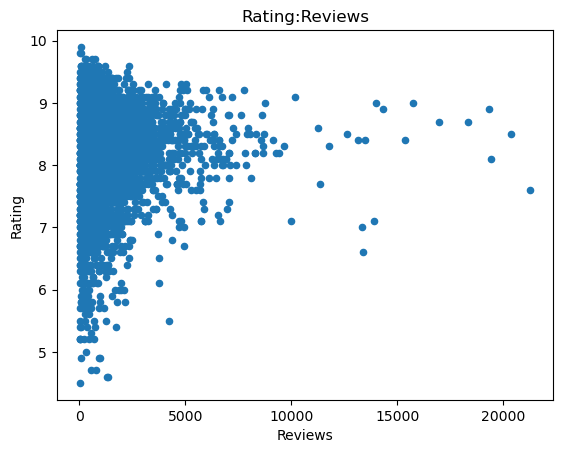

In [33]:
hotels.plot(x='Reviews', y= 'Rating', kind='scatter',title= 'Rating:Reviews')

<Axes: title={'center': 'Rating:Location'}, xlabel='Location', ylabel='Rating'>

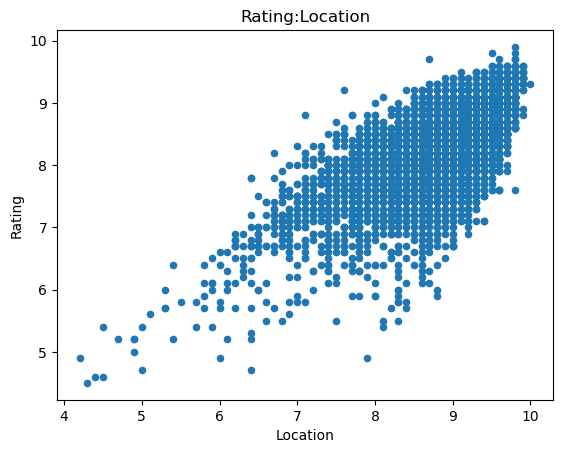

In [34]:
hotels.plot(x='Location', y= 'Rating', kind='scatter',title= 'Rating:Location')

<Axes: title={'center': 'Price:Location'}, xlabel='Location', ylabel='Price'>

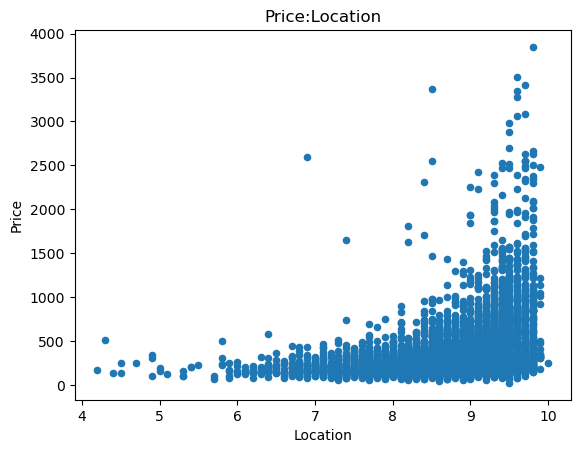

In [35]:
hotels.plot(x='Location', y= 'Price', kind='scatter',title= 'Price:Location')

[339.0, 251.0]


<BarContainer object of 2 artists>

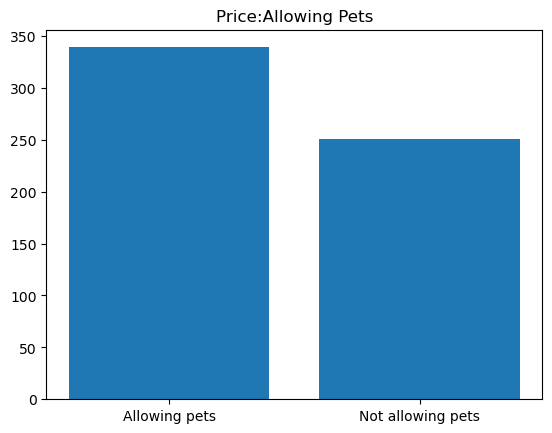

In [37]:
prices = [hotels[hotels['Allowing pets']==True].Price.median(),
          hotels[hotels['Allowing pets']==False].Price.median()]
print(prices)
plt.figure()
plt.subplot(111)
plt.axis('on')
plt.title('Price:Allowing Pets')
plt.bar(['Allowing pets','Not allowing pets'], prices)

[8.9, 8.8]


<BarContainer object of 2 artists>

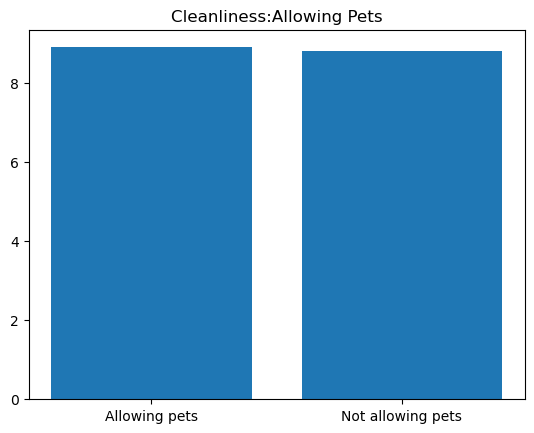

In [38]:
cleanScore = [hotels[hotels['Allowing pets']==True].Cleanliness.median(),
              hotels[hotels['Allowing pets']==False].Cleanliness.median()]
print(cleanScore)
plt.figure()
plt.subplot(111)
plt.axis('on')
plt.title('Cleanliness:Allowing Pets')
plt.bar(['Allowing pets','Not allowing pets'], cleanScore)

# Machine learning

In [18]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
hotelsDf = pd.read_csv(r"C:\Users\sahee\Downloads\CleanHotels.csv")
hotelsDf

,Name,City,Price,Rating,Stars,Reviews,Location,Cleanliness,staff,Comfort,Value for Money,Facilities,Wifi,Closest attraction dist,Closest transportation,Closest airport,payment methods,Number of languages,Allowing pets
0,Schulz Hotel Berlin Wall at the East Side Gal...,Budapest,191.0,8.7,3,18362,9.2,9.0,9.0,8.8,8.6,8.6,9.1,2.0,0.2,17.0,4.0,4,True
1,Novotel Suites Berlin City Potsdamer Platz,Budapest,259.0,8.2,3,4463,9.1,8.5,8.4,8.3,8.4,8.2,7.8,0.7,0.5,17.9,6.0,6,True
2,NH Collection Berlin Mitte Friedrichstrasse,Budapest,371.0,8.8,4,6220,9.6,9.0,9.0,9.0,8.5,8.8,8.8,0.9,0.1,19.3,6.0,4,True
3,Ibis budget Berlin Potsdamer Platz,Budapest,156.0,7.8,1,4716,9.0,8.6,8.3,8.1,7.6,7.4,8.4,0.8,0.4,17.9,4.0,5,True
4,Hollywood Media Hotel am Kurfürstendamm,Budapest,246.0,8.4,4,3505,9.4,8.8,8.6,8.6,8.4,8.4,8.6,3.4,0.4,20.0,7.0,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,Hotel Maxim Design Hotel 3 Star Superior,Tel Aviv,599.0,8.5,3,1514,8.7,9.6,8.8,8.1,8.4,8.3,7.9,1.0,1.0,13.0,4.0,5,False
5706,Hotel Dan Tel Aviv Hotel,Tel Aviv,1096.0,7.5,5,312,9.2,7.9,7.8,7.9,7.4,6.5,8.5,0.8,1.0,13.1,4.0,6,False
5707,Hotel Renaissance Tel Aviv Hotel,Tel Aviv,994.0,8.1,5,858,9.4,8.4,8.6,8.4,7.9,7.2,8.5,1.1,1.0,13.3,4.0,6,False
5708,Hotel Numa Hotel Jaffa,Tel Aviv,548.0,9.5,4,249,9.3,9.6,9.6,9.6,9.3,9.4,9.8,2.6,2.0,12.0,4.0,3,False


# Preprocessing the data 

In [7]:
le = LabelEncoder()

In [8]:
# label encode cities
hotelsDf['City'] = le.fit_transform(hotelsDf['City'])

In [9]:
# label encode Allowing pets
hotelsDf['Allowing pets'] = le.fit_transform(hotelsDf['Allowing pets'])

In [10]:
categorized_hotel = hotelsDf.drop(labels = 'Name', axis=1)

In [11]:
categorized_hotel.corr()

,City,Price,Rating,Stars,Reviews,Location,Cleanliness,staff,Comfort,Value for Money,Facilities,Wifi,Closest attraction dist,Closest transportation,Closest airport,payment methods,Number of languages,Allowing pets
City,1.000000,0.027764,-0.087438,-0.140853,-0.177755,-0.123634,-0.063155,-0.142152,-0.091378,-0.023581,-0.034817,-0.047329,-0.033034,-0.084156,-0.234132,0.305587,-0.179475,-0.170316
Price,0.027764,1.000000,0.322665,0.514778,-0.081084,0.336538,0.300951,0.359384,0.344829,0.250533,0.139036,0.228601,-0.164987,-0.069660,-0.180972,0.056272,0.319774,0.175747
Rating,-0.087438,0.322665,1.000000,0.390476,0.033553,0.703472,0.851704,0.929274,0.920182,0.843465,0.929130,0.619511,-0.118934,-0.030863,0.041943,0.034294,0.106844,0.087314
Stars,-0.140853,0.514778,0.390476,1.000000,0.089351,0.339285,0.291256,0.459962,0.463998,0.262895,0.277052,0.244577,-0.044607,0.044352,0.049850,0.074423,0.278933,0.168160
Reviews,-0.177755,-0.081084,0.033553,0.089351,1.000000,0.085987,-0.013559,0.041216,0.033046,-0.002459,0.044947,0.000571,-0.043929,-0.087337,-0.042540,0.025638,0.120048,0.110545
Location,-0.123634,0.336538,0.703472,0.339285,0.085987,1.000000,0.663893,0.685884,0.623269,0.421527,0.560763,0.437252,-0.315891,-0.186409,0.018099,0.003411,0.170158,0.085090
Cleanliness,-0.063155,0.300951,0.851704,0.291256,-0.013559,0.663893,1.000000,0.790317,0.762174,0.652804,0.754692,0.527090,-0.160506,-0.069825,0.000909,-0.003524,0.132163,0.097345
staff,-0.142152,0.359384,0.929274,0.459962,0.041216,0.685884,0.790317,1.000000,0.873473,0.749814,0.857741,0.582724,-0.119268,-0.029936,-0.013088,0.023965,0.169507,0.128992
Comfort,-0.091378,0.344829,0.920182,0.463998,0.033046,0.623269,0.762174,0.873473,1.000000,0.764953,0.860388,0.600440,-0.073878,0.004615,0.049004,0.056914,0.135409,0.104018
Value for Money,-0.023581,0.250533,0.843465,0.262895,-0.002459,0.421527,0.652804,0.749814,0.764953,1.000000,0.834402,0.546181,-0.082308,-0.017709,0.016680,0.043627,0.022009,0.023849


# Machine learning1 - Predicting amount of Stars

In [12]:
df_machine_learning1 = categorized_hotel.copy()
df_machine_learning1['Expirience'] = np.sum(df_machine_learning1.loc[:, ['staff','Cleanliness', 'Comfort']],axis=1)
df_machine_learning1 = categorized_hotel.drop(labels = ['Reviews','Wifi','City'], axis =1)

features = df_machine_learning1.columns[df_machine_learning1.columns != 'Stars']
X = df_machine_learning1[features]
y = pd.Series(df_machine_learning1['Stars'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_model = LogisticRegression().fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

resDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

resDF["correct"] = abs((resDF["Actual"] ^ resDF["Predicted"]) - 1)
resDF[resDF["correct"] == 1]

,Actual,Predicted,correct
2495,3,3,1
561,4,4,1
5612,4,4,1
5278,3,3,1
4586,3,3,1
...,...,...,...
1752,3,3,1
2833,4,4,1
2754,4,4,1
803,4,4,1


In [13]:
print("correct %:",len(resDF[resDF["correct"] == 1]) / len(resDF))

correct %: 0.5612959719789843


# Machine Learning2 - Predicting Price

In [16]:
df_machine_learning2 = categorized_hotel.copy()
df_machine_learning2['Price Range'] = pd.cut(categorized_hotel.Price, bins = 10)
df_machine_learning2['Price Range'] = le.fit_transform(df_machine_learning2['Price Range'])
df_machine_learning2.drop(inplace= True, labels=['Price'],axis=1)

features = df_machine_learning2.columns[df_machine_learning2.columns != 'Price Range']
X = df_machine_learning2[features]
y = pd.Series(df_machine_learning2['Price Range'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression()
clf_model = lr.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

resDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(lr.score(X,y))

0.7189141856392294


# Machine Learning3 - Predicting Rating

In [17]:
df_machine_learning3 = categorized_hotel.copy()

features = df_machine_learning3.columns[df_machine_learning3.columns != 'Rating']
X = df_machine_learning3[features]
y = pd.Series(df_machine_learning3['Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_model = LinearRegression().fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

resDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

r2_score(y_test,y_pred)

0.9699077050837035